In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,VotingClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#from matplotlib import rcParams
#rcParams['figure.figsize']=(20,10)


The project is based to get an idea about customer purchase behavior against different products. Generating insights using Exploratory Data Analysis (EDA) using number of libraries like seaborn, matplotlib, graphiz,
Feature selection, Statistical Testing.
Key skills: Python, EDA, Statistics, Unsupervised (Clustering), Supervised Regression, Ensemble Techniques.

In [2]:
black_friday = pd.read_csv("C:\\Users\\B.SUNIL\\Downloads\\train.csv")
black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
black_friday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
black_friday.User_ID=black_friday.User_ID.astype('int32')
black_friday.Product_Category_1=black_friday.Product_Category_1.astype('int32')
black_friday.Purchase=black_friday.Purchase.astype('int32')
black_friday.Product_Category_2=black_friday.Product_Category_2.astype('float32')
black_friday.Product_Category_3=black_friday.Product_Category_3.astype('float32')


In [5]:
black_friday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int32
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int32
Product_Category_2            376430 non-null float32
Product_Category_3            166821 non-null float32
Purchase                      550068 non-null int32
dtypes: float32(2), int32(3), int64(2), object(5)
memory usage: 39.9+ MB


# Univarient Analysis¶


In [6]:
black_friday.User_ID.unique()


array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [7]:
black_friday.Gender.unique()


array(['F', 'M'], dtype=object)

In [8]:
black_friday.Age.unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
black_friday.Occupation.unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [10]:
black_friday.City_Category.unique()


array(['A', 'C', 'B'], dtype=object)

In [11]:
black_friday.Stay_In_Current_City_Years.unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

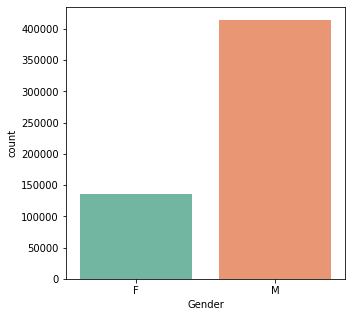

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(black_friday.Gender,palette="Set2")
plt.show()


In [13]:
black_friday.Gender.value_counts()


M    414259
F    135809
Name: Gender, dtype: int64

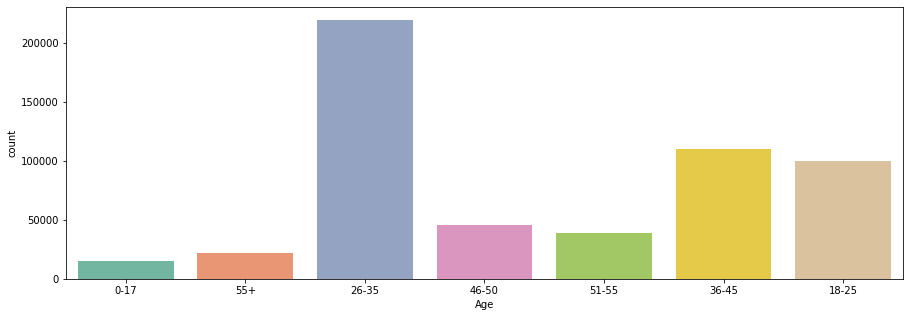

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(black_friday.Age,palette="Set2")
plt.show()


In [15]:
black_friday.Age.value_counts()


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

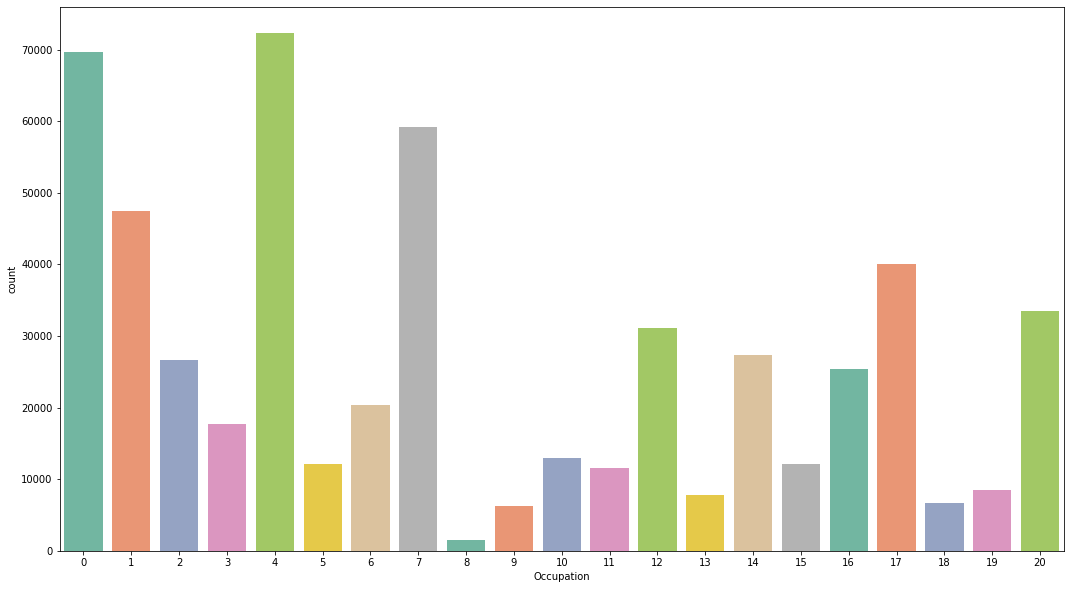

In [16]:
plt.figure(figsize=(18,10))
sns.countplot(black_friday.Occupation,palette="Set2")
plt.show()


In [17]:
black_friday.Occupation.value_counts()


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

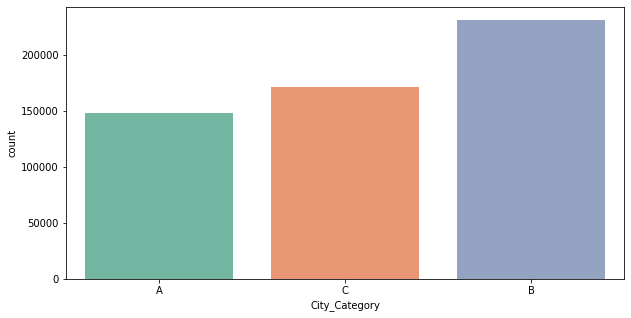

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(black_friday.City_Category,palette="Set2")
plt.show()


In [19]:
black_friday.City_Category.value_counts()


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

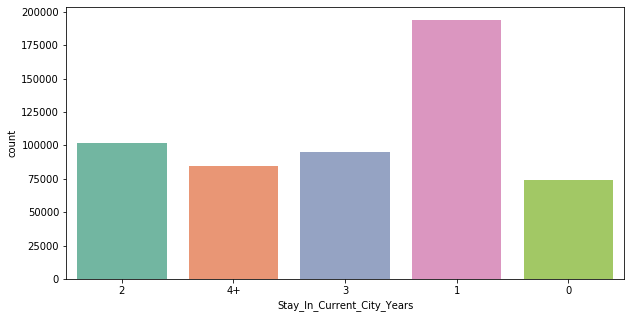

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(black_friday.Stay_In_Current_City_Years,palette='Set2')
plt.show()


In [21]:
black_friday.Stay_In_Current_City_Years.value_counts()


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

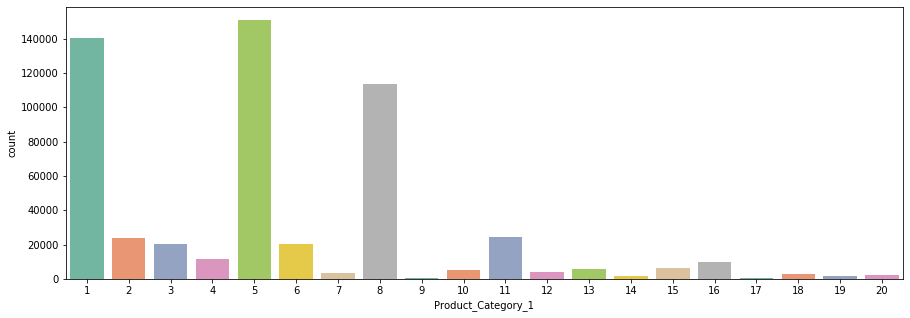

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(black_friday.Product_Category_1,palette='Set2')
plt.show()


In [23]:
black_friday.Product_Category_1.value_counts()


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

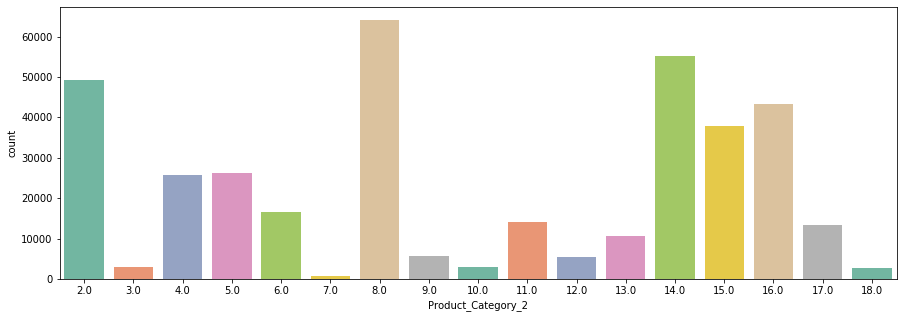

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(black_friday.Product_Category_2,palette='Set2')
plt.show()


In [25]:
black_friday.Product_Category_2.value_counts()


8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

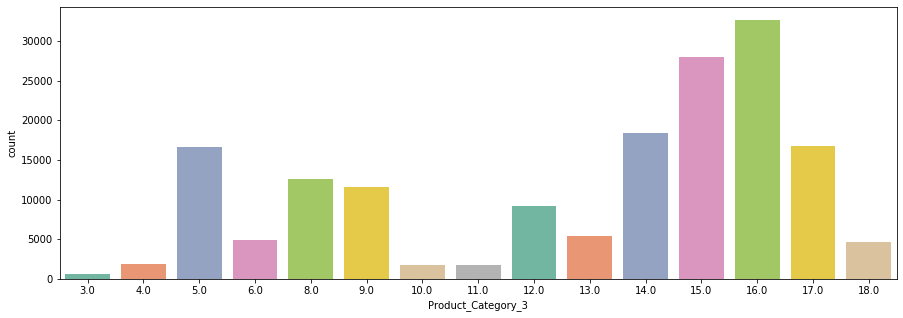

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(black_friday.Product_Category_3,palette='Set2')
plt.show()


In [27]:
black_friday.Product_Category_3.value_counts()


16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

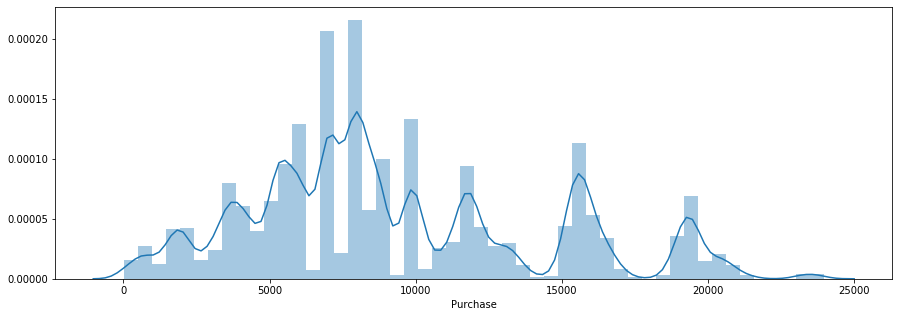

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(black_friday.Purchase)
plt.show()


In [29]:
black_friday.Purchase.value_counts()


7011     191
7193     188
6855     187
6891     184
6960     183
7012     183
6879     182
7166     182
7027     182
7165     180
6868     180
6883     180
6858     179
7185     178
6923     178
7089     178
6931     178
7093     178
7114     177
7188     177
7060     176
6908     176
7085     176
7167     175
7159     175
6973     175
7146     175
6928     175
6949     175
7192     174
        ... 
14650      1
15063      1
17112      1
11151      1
3365       1
4724       1
14296      1
10499      1
5687       1
14593      1
23855      1
17366      1
23863      1
10355      1
2931       1
6708       1
349        1
3389       1
14896      1
4868       1
14114      1
208        1
14682      1
14138      1
10290      1
15105      1
14384      1
10453      1
8537       1
14640      1
Name: Purchase, Length: 18105, dtype: int64

# Bivarient Analysis¶


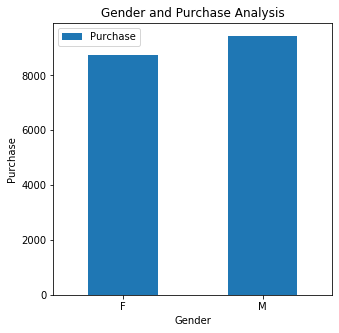

In [30]:
Gender_pivot =black_friday.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

Gender_pivot.plot(kind='bar',figsize=(5,5))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()


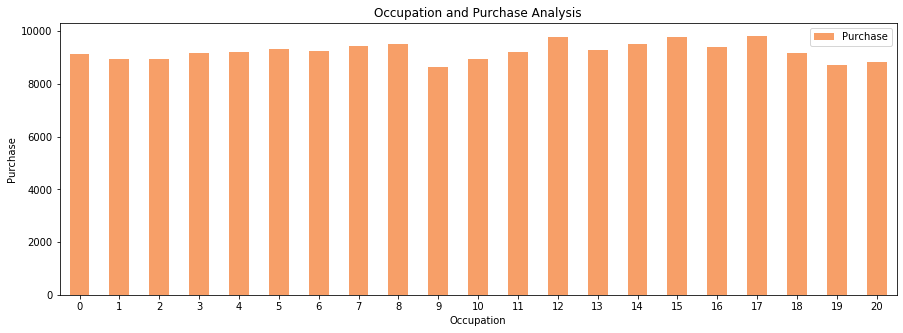

In [31]:
Occupation_pivot =black_friday.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='#f79f68',figsize=(15,5))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Occupation and Purchase Analysis")
plt.show()


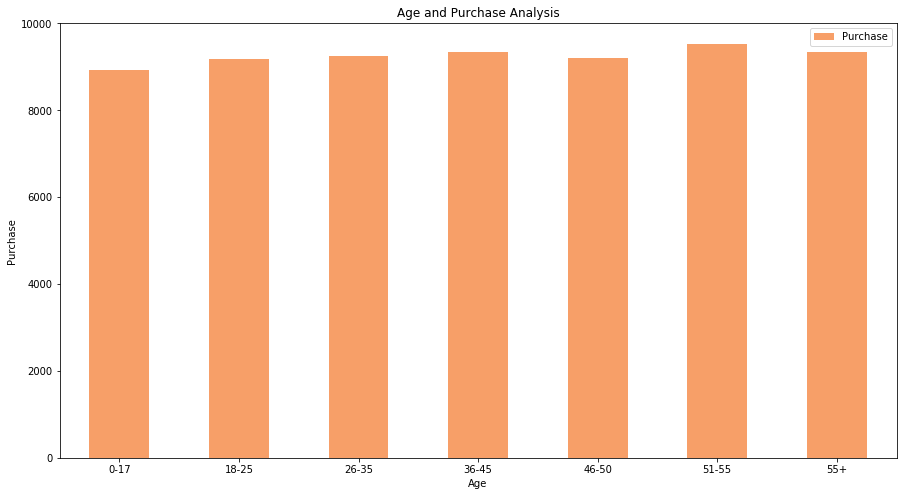

In [32]:
Age_pivot =black_friday.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
Age_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Age and Purchase Analysis")
plt.show()


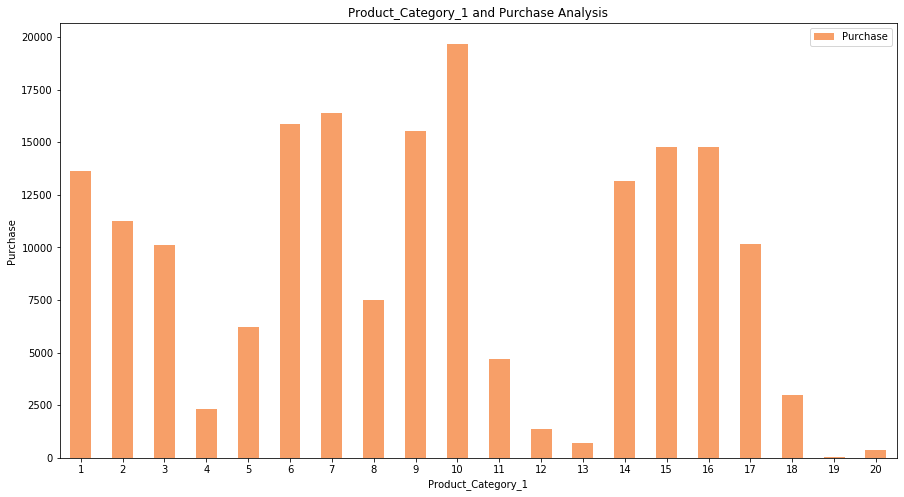

In [33]:
Product_Category_1_pivot =black_friday.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_Category_1_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()


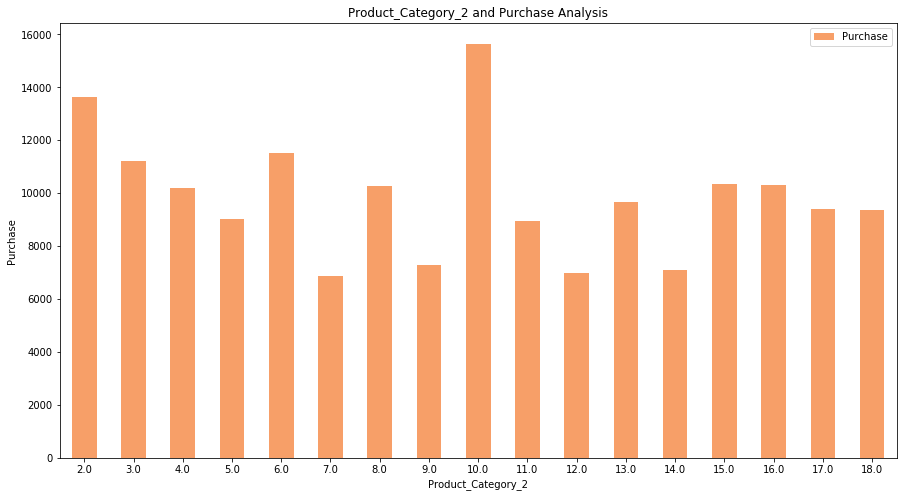

In [34]:
Product_Category_2_pivot =black_friday.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_Category_2_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Product_Category_2 and Purchase Analysis")
plt.show()


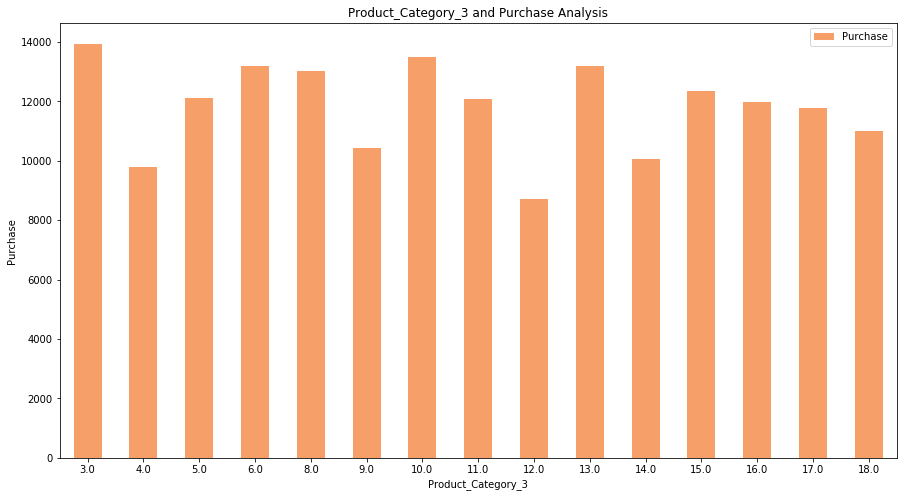

In [35]:
Product_Category_3_pivot =black_friday.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Product_Category_3_pivot.plot(kind='bar', color='#f79f68',figsize=(15,8))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Product_Category_3 and Purchase Analysis")
plt.show()


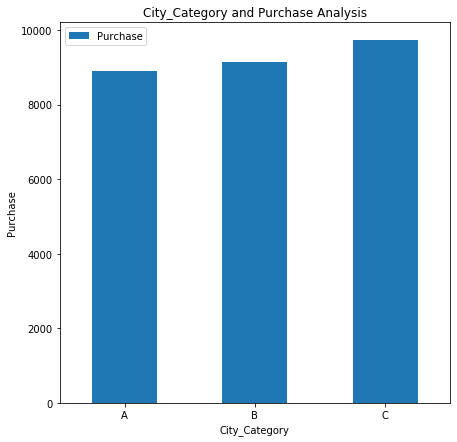

In [36]:
City_Category_pivot =black_friday.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
City_Category_pivot.plot(kind='bar',figsize=(7,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("City_Category and Purchase Analysis")
plt.show()


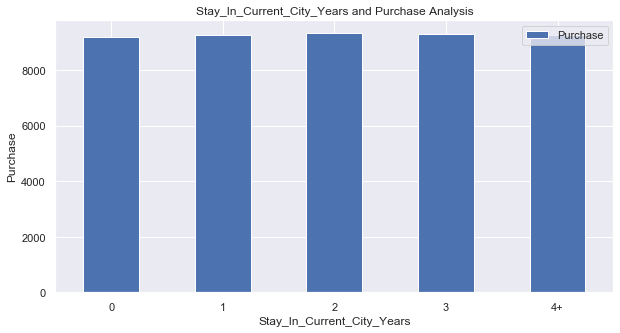

In [37]:
sns.set()
Stay_In_Current_City_Years_pivot =black_friday.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()


# Data Pre-processing¶


In [38]:
row,col=black_friday.shape
black_friday.isnull().sum()/row*100


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [39]:
black_friday.apply(lambda x: len(x.unique()))


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [40]:
black_friday.shape


(550068, 12)

In [41]:
black_friday['Stay_In_Current_City_Years'] = black_friday['Stay_In_Current_City_Years'].replace({'4+': 4})


In [42]:
def remove_P(value):
  try:
    value=value[1:]
    return value
  except:
    TypeError


In [43]:
black_friday.Product_ID=black_friday.Product_ID.apply(remove_P)


In [44]:
black_friday.Product_ID=black_friday.Product_ID.astype('int32')


# Feature Engineering¶


In [45]:
gender_dict = {'F':0, 'M':1}
black_friday.Gender = black_friday.Gender.apply(lambda x: gender_dict[x])


In [46]:
black_friday.Gender.value_counts()


1    414259
0    135809
Name: Gender, dtype: int64

In [47]:
age_dict={'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}

black_friday.Age=black_friday.Age.apply(lambda x: age_dict[x])
black_friday.Age.value_counts()


2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [48]:
city_dict={'A':0,'B':1,'C':2}

black_friday.City_Category=black_friday.City_Category.apply(lambda x: city_dict[x])
black_friday.City_Category.value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [49]:
black_friday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [50]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int32
Product_ID                    550068 non-null int32
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int32
Product_Category_2            376430 non-null float32
Product_Category_3            166821 non-null float32
Purchase                      550068 non-null int32
dtypes: float32(2), int32(4), int64(5), object(1)
memory usage: 37.8+ MB


In [51]:
black_friday['User_ID'].nunique()


5891

In [52]:
black_friday.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.017619,-0.033474,0.032698,-0.023971,0.022859,0.020443,0.003825,0.001529,0.003419,0.004716
Product_ID,-0.017619,1.000000,0.021084,0.028892,0.009344,0.010162,0.013194,0.090193,0.034114,0.044938,-0.103961
Gender,-0.033474,0.021084,1.000000,-0.004262,0.117291,-0.004515,-0.011603,-0.045594,-0.018591,0.028069,0.060346
Age,0.032698,0.028892,-0.004262,1.000000,0.091463,0.123079,0.311738,0.061197,0.054877,0.057346,0.015839
Occupation,-0.023971,0.009344,0.117291,0.091463,1.000000,0.034479,0.024280,-0.007618,-0.000384,0.013263,0.020833
City_Category,0.022859,0.010162,-0.004515,0.123079,0.034479,1.000000,0.039790,-0.014364,-0.011822,-0.002347,0.061914
Marital_Status,0.020443,0.013194,-0.011603,0.311738,0.024280,0.039790,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,0.090193,-0.045594,0.061197,-0.007618,-0.014364,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,0.034114,-0.018591,0.054877,-0.000384,-0.011822,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.044938,0.028069,0.057346,0.013263,-0.002347,0.019473,0.229678,0.543649,1.000000,-0.022006


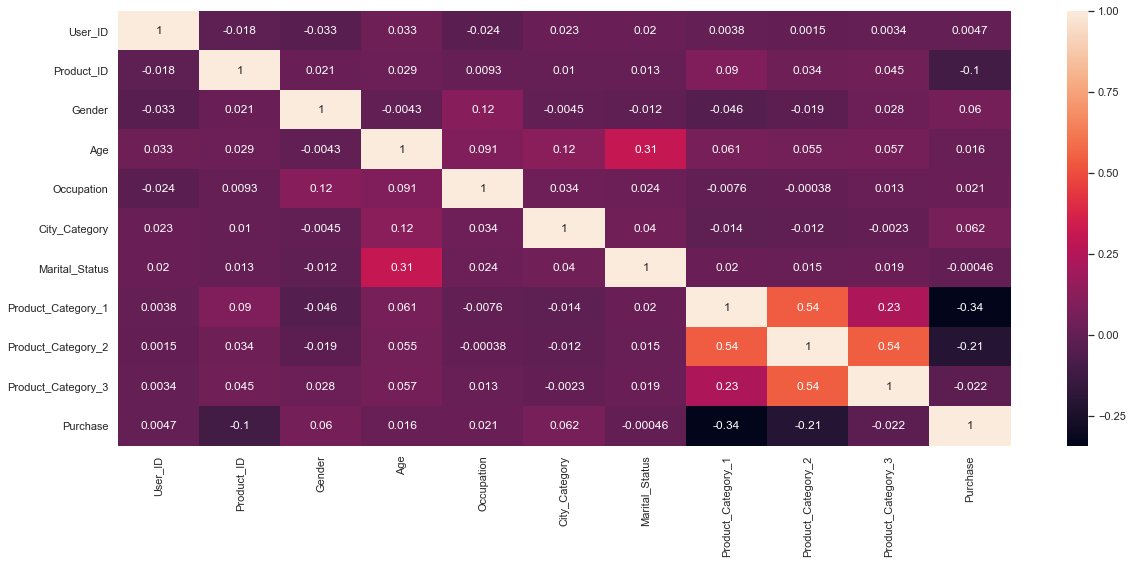

In [53]:
plt.figure(figsize=(20,8))
sns.heatmap(black_friday.corr(),annot=True)
plt.show()


C:\Users\B.SUNIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\B.SUNIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


TypeError: 4 is not a string

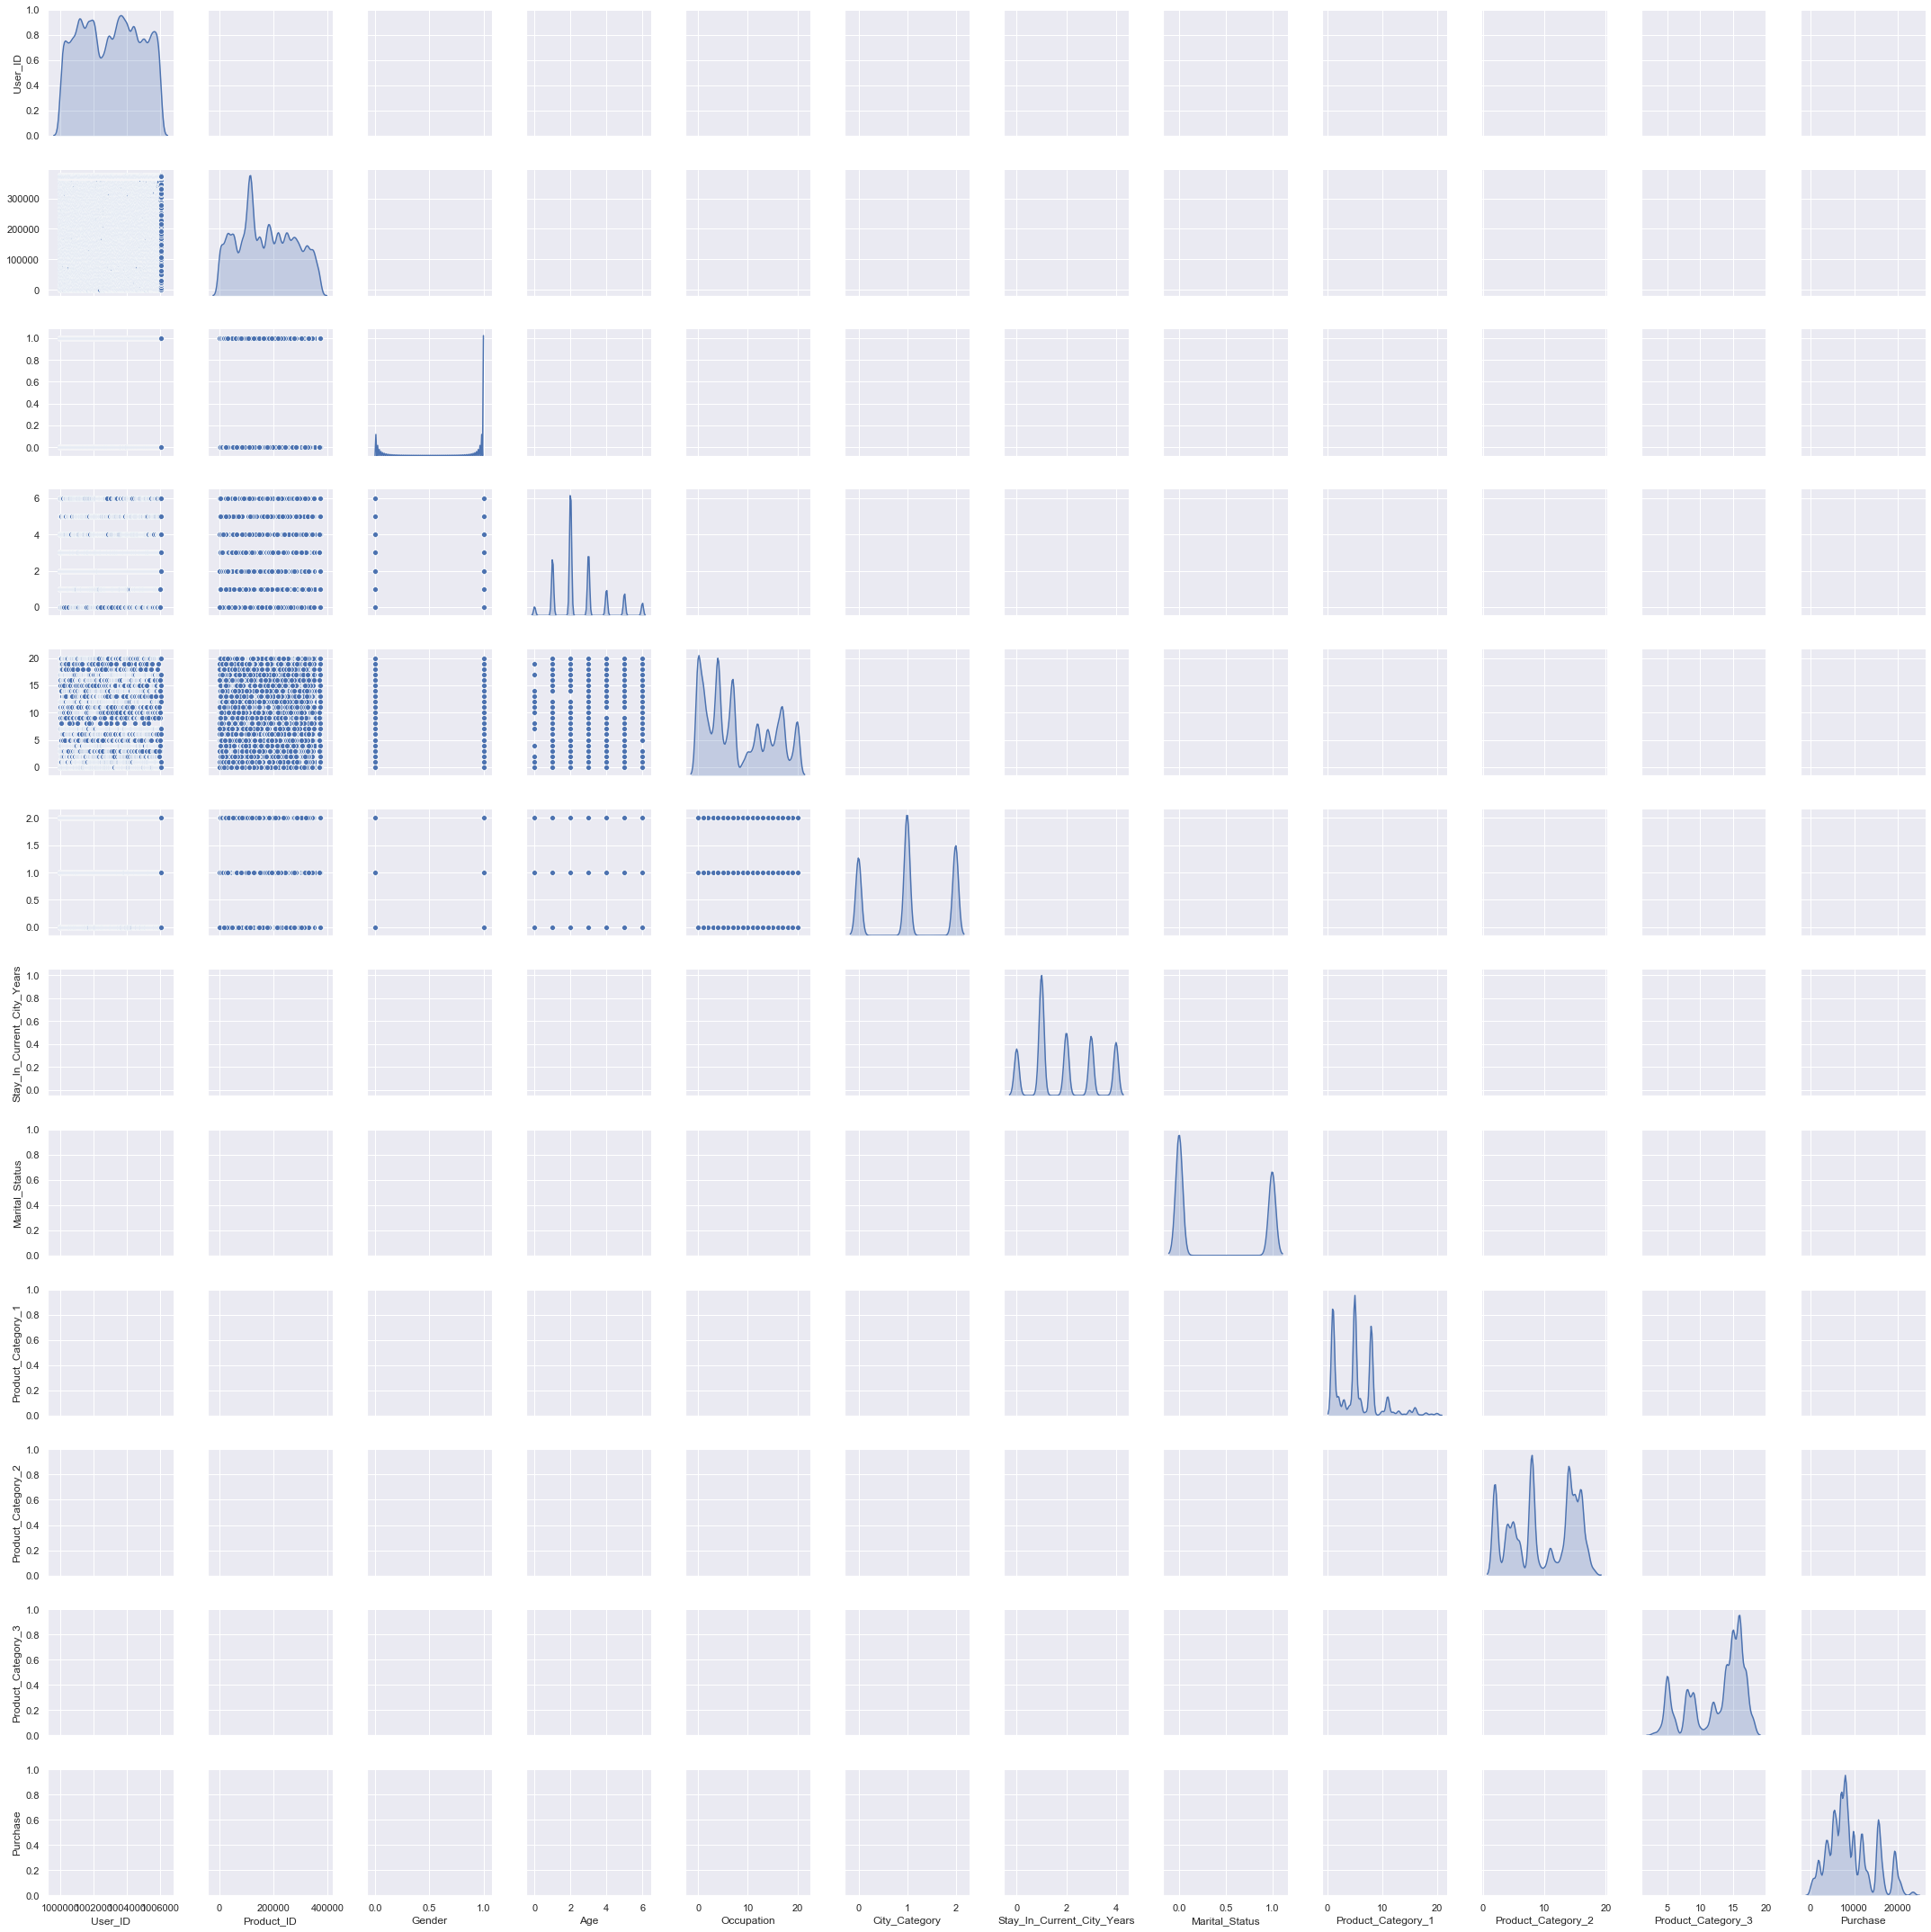

In [54]:
sns.pairplot(black_friday,diag_kind='kde')
plt.show()


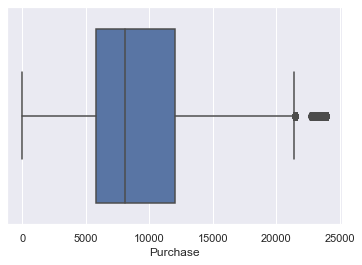

In [55]:
sns.boxplot(black_friday.Purchase)


In [56]:
black_friday.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)


In [57]:
data_with_dummy=pd.get_dummies(data=black_friday,columns=['Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1'], drop_first=False)


In [58]:
len(data_with_dummy.columns)


61

In [59]:
data_with_dummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 61 columns):
User_ID                         550068 non-null int32
Product_ID                      550068 non-null int32
Gender                          550068 non-null int64
Marital_Status                  550068 non-null int64
Purchase                        550068 non-null int32
Age_0                           550068 non-null uint8
Age_1                           550068 non-null uint8
Age_2                           550068 non-null uint8
Age_3                           550068 non-null uint8
Age_4                           550068 non-null uint8
Age_5                           550068 non-null uint8
Age_6                           550068 non-null uint8
Occupation_0                    550068 non-null uint8
Occupation_1                    550068 non-null uint8
Occupation_2                    550068 non-null uint8
Occupation_3                    550068 non-null uint8
Occupation_4             

In [60]:
data_cluster=data_with_dummy.drop(['User_ID','Purchase','Product_ID'],axis=1)
usr_cout=black_friday.groupby('User_ID',as_index=False)['Product_ID'].count()
black_friday.Product_ID.value_counts()


265242    1880
25442     1615
110742    1612
112142    1562
57642     1470
184942    1440
46742     1438
58042     1422
145042    1406
59442     1406
237542    1394
255842    1383
117942    1364
110942    1360
10742     1350
220442    1282
110842    1281
117442    1260
51442     1249
102642    1246
278642    1226
242742    1215
34742     1212
148642    1204
80342     1203
31042     1200
28842     1197
251242    1187
114942    1178
270942    1152
          ... 
62442        1
309642       1
56342        1
204042       1
353042       1
185942       1
91742        1
68342        1
339142       1
22042        1
299342       1
203642       1
56642        1
91542        1
83142        1
60742        1
285142       1
81342        1
126342       1
8942         1
62342        1
329042       1
291642       1
12342        1
308042       1
133042       1
160742       1
353742       1
70142        1
77342        1
Name: Product_ID, Length: 3631, dtype: int64

In [61]:
final_data=pd.merge(usr_cout,black_friday,on='User_ID',how='inner')
final_data.Product_ID_x.unique()


array([  35,   77,   29,   14,  106,   47,   17,   58,  223,   70,   11,
         60,   13,  117,   22,  115,  180,  145,   12,  156,  171,   44,
        226,   42,   57,   52,   31,   64,   24,  216,  100,  111,  200,
         30,   41,   16,  125,  120,  162,   21,  338,   25,  377,   38,
         43,  261,  128,   36,   20,  282,   63,   67,   26,   27,  134,
         51,   86,   32,   59,   53,   19,   37,   33,  137,    7,   56,
         83,   65,   66,   87,   28,   55,  283,  119,  352,   15,   85,
         80,  153,   45,   93,  102,   39,  227,   34,  238,   95,  339,
        334,  135,   18,   54,  217,   10,  184,  271,  313,  315,   40,
        170,  244,   81,  285,  467,  208,  207,  379,  246,   84,  108,
         68,   94,  430,   50,  131,  293,  268,   89,  140,  166,  435,
        130,   76,   90,  218,   62,   49,  275,   78,  143,   75,  188,
        280,   79,  114,  176,  105,   48,  154,  204,  454,  113,  322,
        122,  174,  420,    8,  132,  447,  340,   

In [62]:
data_cluster["User_count"]=final_data.Product_ID_x
final_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int64
Product_ID_x                  550068 non-null int64
Product_ID_y                  550068 non-null int32
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int32
Purchase                      550068 non-null int32
dtypes: int32(3), int64(7), object(1)
memory usage: 44.1+ MB


In [63]:
data_cluster.head()


,Gender,Marital_Status,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_0,...,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,User_count
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,35
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,35
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,35


In [64]:
SC=StandardScaler()
final_cluster=SC.fit_transform(data_cluster)


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_cluster=scaler.fit_transform(data_cluster)


In [67]:
cluster_range=range(2,11)
cluster_errors=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10)
  clusters.fit(final_cluster)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df


,num_clusters,cluster_errors
0,2,2.200412e+06
1,3,2.037137e+06
2,4,1.966822e+06
3,5,1.906157e+06
4,6,1.866456e+06
5,7,1.822538e+06
6,8,1.791937e+06
7,9,1.759599e+06
8,10,1.734246e+06


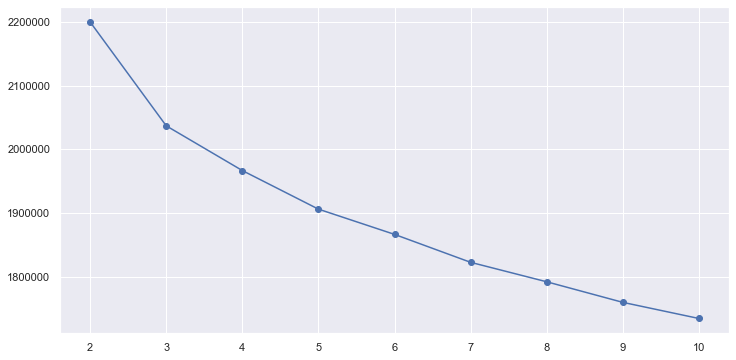

In [68]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


In [69]:
Kmean_cluster=KMeans(7,random_state=0)
predict=Kmean_cluster.fit_predict(data_cluster)


In [70]:
black_friday['Cluster_No']=predict


In [71]:
black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
0,1000001,69042,0,0,10,0,2,0,3,8370,3
1,1000001,248942,0,0,10,0,2,0,1,15200,3
2,1000001,87842,0,0,10,0,2,0,12,1422,3
3,1000001,85442,0,0,10,0,2,0,12,1057,3
4,1000002,285442,1,6,16,2,4,0,8,7969,3
5,1000003,193542,1,2,15,0,3,0,1,15227,3
6,1000004,184942,1,4,7,1,2,1,1,19215,3
7,1000004,346142,1,4,7,1,2,1,1,15854,3
8,1000004,97242,1,4,7,1,2,1,1,15686,3
9,1000005,274942,1,2,20,0,1,1,8,7871,3


In [72]:
black_friday.Cluster_No.unique()


array([3, 4, 1, 5, 2, 0, 6], dtype=int64)

In [73]:
black_friday.Cluster_No.value_counts()


3    170441
4    136991
1    104247
5     65000
2     52419
0     16382
6      4588
Name: Cluster_No, dtype: int64

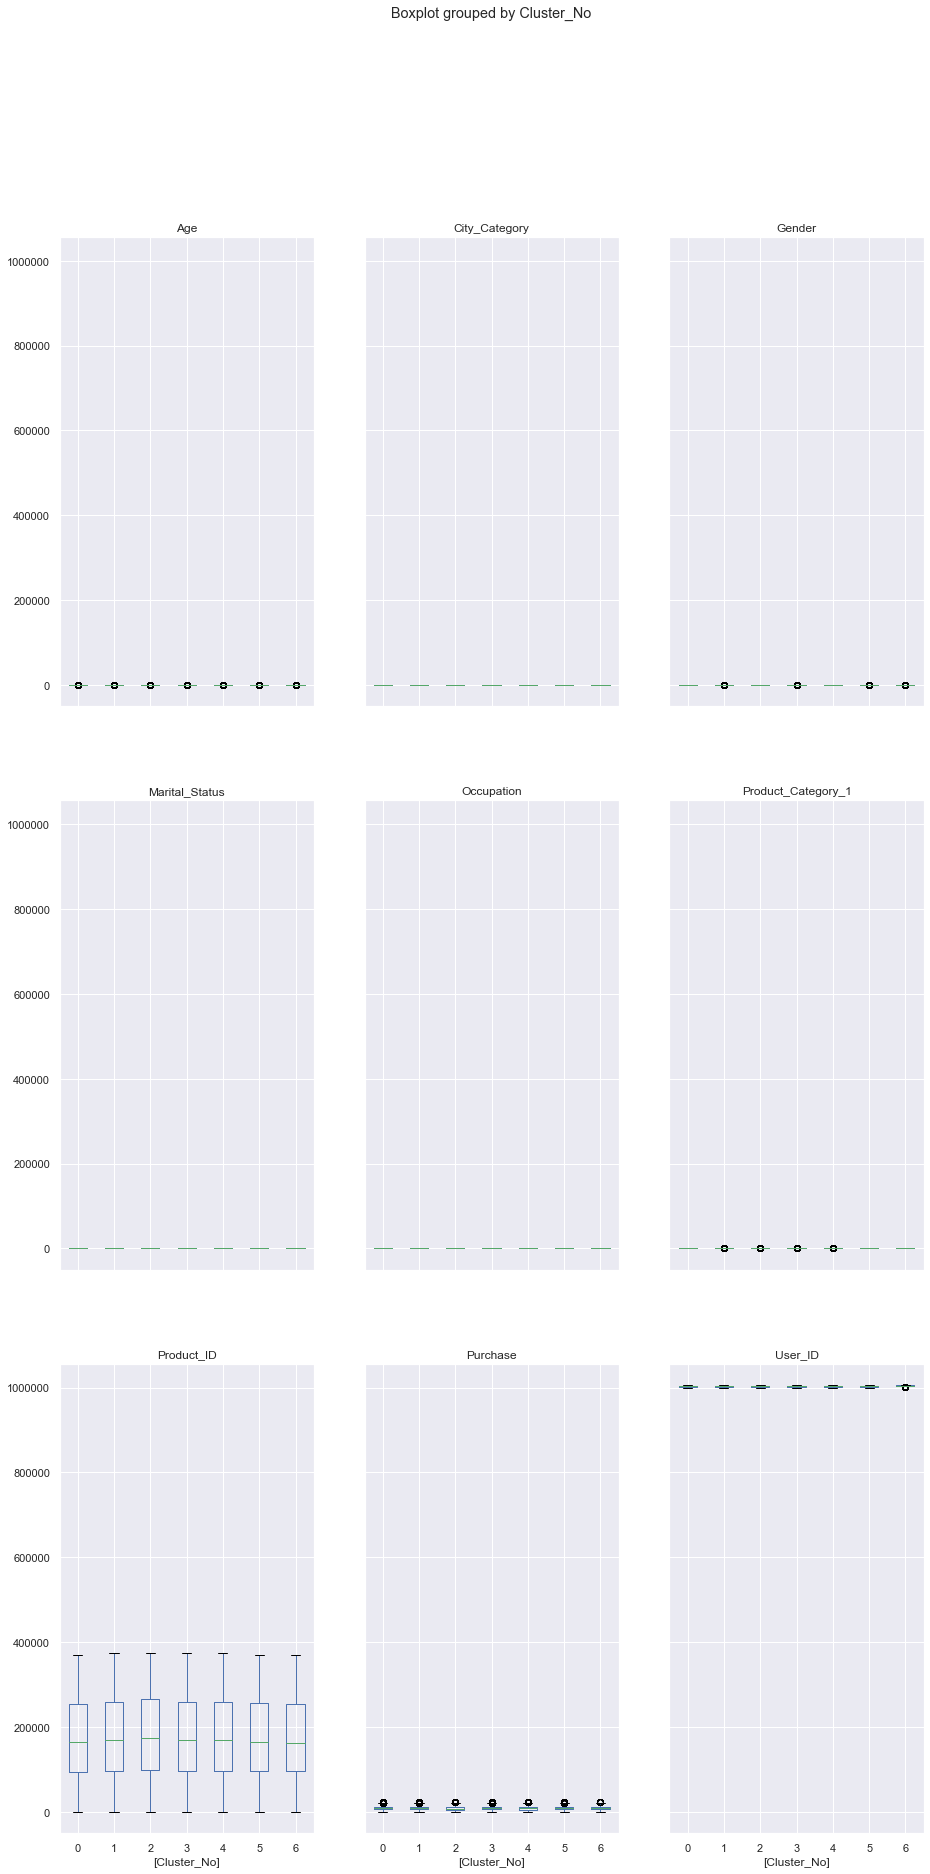

In [74]:
black_friday.boxplot(by = 'Cluster_No',  layout=(4,3), figsize=(15, 40))
plt.show()


In [75]:
black_friday.Cluster_No.value_counts()


3    170441
4    136991
1    104247
5     65000
2     52419
0     16382
6      4588
Name: Cluster_No, dtype: int64

In [76]:
data_Cluster_0=black_friday[black_friday['Cluster_No']==0]


In [77]:
data_Cluster_0.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
35052,1005412,116742,1,2,12,0,3,0,11,7488,0
35053,1005412,111142,1,2,12,0,3,0,1,19349,0
35054,1005412,278942,1,2,12,0,3,0,1,19595,0
35055,1005412,286742,1,2,12,0,3,0,1,11664,0
35056,1005412,242442,1,2,12,0,3,0,1,4520,0


In [79]:
data_Cluster_1=black_friday[black_friday['Cluster_No']==1]
data_Cluster_1.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
460,1000083,199442,0,2,2,2,1,0,5,6889,1
461,1000083,54542,0,2,2,2,1,0,1,11730,1
462,1000084,34742,1,1,4,2,1,0,5,5315,1
463,1000084,42242,1,1,4,2,1,0,5,3497,1
464,1000084,277442,1,1,4,2,1,0,1,11896,1


In [80]:
data_Cluster_2=black_friday[black_friday['Cluster_No']==2]
data_Cluster_2.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
15521,1002334,247042,0,6,7,1,1,1,5,6878,2
15522,1002334,104542,0,6,7,1,1,1,8,4133,2
15523,1002334,92142,0,6,7,1,1,1,8,6105,2
15524,1002335,116142,1,5,17,0,3,0,10,4987,2
15525,1002335,112342,1,5,17,0,3,0,13,772,2


In [81]:
data_Cluster_3=black_friday[black_friday['Cluster_No']==3]
data_Cluster_3.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
0,1000001,69042,0,0,10,0,2,0,3,8370,3
1,1000001,248942,0,0,10,0,2,0,1,15200,3
2,1000001,87842,0,0,10,0,2,0,12,1422,3
3,1000001,85442,0,0,10,0,2,0,12,1057,3
4,1000002,285442,1,6,16,2,4,0,8,7969,3


In [82]:
data_Cluster_4=black_friday[black_friday['Cluster_No']==4]
data_Cluster_4.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
155,1000029,303342,1,3,7,2,1,0,1,11859,4
156,1000030,51442,0,3,7,2,3,0,8,9735,4
157,1000030,275642,0,3,7,2,3,0,8,4166,4
158,1000030,278642,0,3,7,2,3,0,5,6927,4
159,1000031,117442,1,6,7,2,2,0,5,8596,4


In [84]:
data_Cluster_4=black_friday[black_friday['Cluster_No']==5]
data_Cluster_4.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
3556,1000575,53942,1,2,12,1,0,1,1,12040,5
3557,1000575,28042,1,2,12,1,0,1,1,12108,5
3558,1000575,241542,1,2,12,1,0,1,1,11919,5
3559,1000575,277642,1,2,12,1,0,1,2,12899,5
3560,1000576,10942,0,4,15,2,1,1,1,8023,5


In [85]:
data_Cluster_6=black_friday[black_friday['Cluster_No']==6]
data_Cluster_6.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Cluster_No
74802,1005530,276342,0,1,4,1,0,0,5,5389,6
74803,1005530,5142,0,1,4,1,0,0,5,8571,6
74804,1005530,205942,0,1,4,1,0,0,5,7113,6
74805,1005530,33342,0,1,4,1,0,0,5,3645,6
74806,1005530,87442,0,1,4,1,0,0,5,7180,6


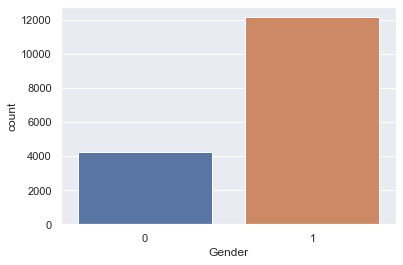

In [86]:
sns.countplot(data_Cluster_0.Gender)


In [87]:
data_Cluster_0.Gender.value_counts()


1    12134
0     4248
Name: Gender, dtype: int64

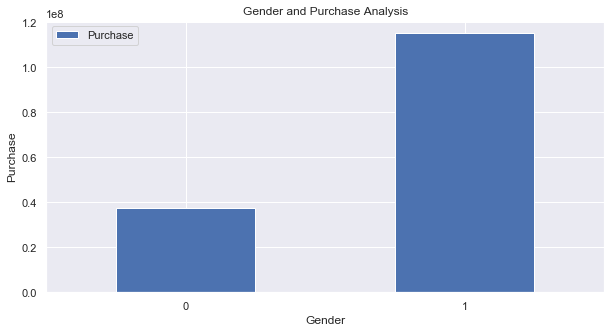

In [88]:
sns.set()
Cluster_0_Gender_pivot =data_Cluster_0.pivot_table(index='Gender', values="Purchase", aggfunc=np.sum)
Cluster_0_Gender_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()


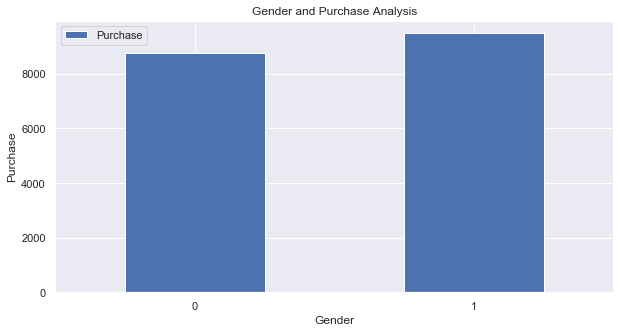

In [89]:
sns.set()
Cluster_0_Gender_pivot =data_Cluster_0.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
Cluster_0_Gender_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()


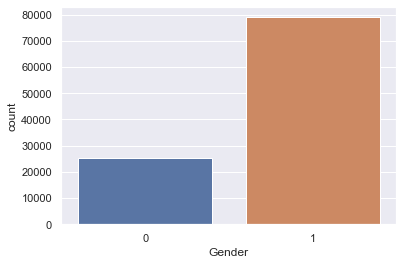

In [90]:
sns.countplot(data_Cluster_1.Gender)


In [91]:
data_Cluster_1.Gender.value_counts()


1    79019
0    25228
Name: Gender, dtype: int64

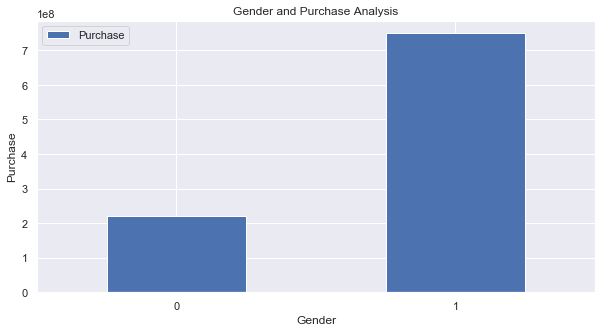

In [92]:
sns.set()
Cluster_1_Gender_pivot =data_Cluster_1.pivot_table(index='Gender', values="Purchase", aggfunc=np.sum)
Cluster_1_Gender_pivot.plot(kind='bar',figsize=(10,5))

plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.title("Gender and Purchase Analysis")
plt.show()


In [93]:
print(Cluster_1_Gender_pivot)


         Purchase
Gender           
0       221640094
1       748789136


In [95]:
black_friday['Cluster_No']=predict


In [96]:
TOP_100_Product=black_friday[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(100)
TOP_100_Product


,Purchase
Product_ID,
25442,27995166
110742,26722309
255842,25168963
59442,24338343
184942,24334887
112142,24216006
110942,23639564
237542,23425576
57642,23102780


In [98]:
TOP_Product_Clsuter_0=data_Cluster_0[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(3)
TOP_Product_Clsuter_0

,Purchase
Product_ID,
237542,870451
110742,841371
25442,773051


In [99]:
data_Cluster_0.Product_ID.value_counts()


265242    58
110742    52
237542    51
58042     51
117442    47
145042    46
25442     45
117942    45
46742     43
142       41
242742    40
34742     40
110842    38
102642    38
31042     38
270942    38
59442     38
220442    37
51442     36
251242    36
112142    36
80342     36
44442     35
148642    35
334242    35
28842     34
199442    34
57642     34
147942    34
184942    34
          ..
337342     1
349142     1
228142     1
238242     1
236042     1
148142     1
29642      1
180942     1
86942      1
263642     1
139842     1
229942     1
165242     1
341042     1
185542     1
8642       1
301842     1
353542     1
136342     1
119942     1
162542     1
56042      1
206142     1
9542       1
197142     1
39642      1
238942     1
54342      1
16942      1
258042     1
Name: Product_ID, Length: 2609, dtype: int64

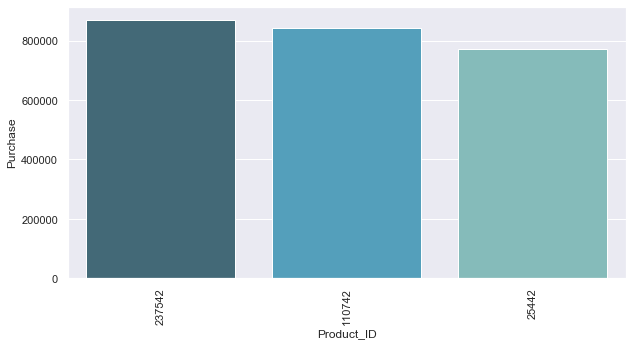

In [104]:
#TOP_15_Clsuter_0.plot(kind='bar',figsize=(10,15))
plt.figure(figsize=(10,5))
sns.barplot(x=TOP_Product_Clsuter_0.index,y='Purchase',data=TOP_Product_Clsuter_0,order=TOP_Product_Clsuter_0.index,palette="GnBu_d")
plt.xticks(rotation=90)
plt.show()


In [105]:
TOP_Product_Clsuter_1=data_Cluster_1[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(25)
TOP_Product_Clsuter_1


,Purchase
Product_ID,
255842,5293787
59442,4866348
112142,4861234
25442,4833920
110942,4769926
110742,4726513
57642,4700004
184942,4538980
46742,4483401


In [106]:
data_Cluster_1.Product_ID.value_counts()


265242    395
112142    315
46742     298
255842    294
57642     293
110742    287
58042     285
145042    285
59442     283
25442     277
110942    272
184942    264
10742     263
117442    262
237542    258
251242    253
220442    247
110842    239
51442     239
117942    236
278642    235
34742     232
80342     230
112542    230
270942    230
28842     229
334242    226
142       225
148642    224
242742    224
         ... 
171942      1
363542      1
68742       1
259642      1
163642      1
114242      1
257242      1
236742      1
77442       1
248242      1
149742      1
297142      1
185942      1
99142       1
54742       1
242642      1
133942      1
338642      1
103742      1
161642      1
71942       1
324242      1
157242      1
55742       1
170742      1
64442       1
107842      1
200942      1
131942      1
122642      1
Name: Product_ID, Length: 3350, dtype: int64

In [107]:
TOP_Product_Clsuter_2=data_Cluster_2[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(12)
TOP_Product_Clsuter_2


,Purchase
Product_ID,
25442,2591478
10742,2459750
110742,2408701
59442,2353320
255842,2317797
110942,2268253
184942,2256690
112142,2232486
57642,2176449


In [108]:
data_Cluster_2.Product_ID.value_counts()


371644    229
370853    211
375436    205
372445    202
370293    171
265242    162
117942    154
25442     150
10742     149
58042     147
110742    145
112142    141
57642     139
242742    139
184942    132
59442     132
110942    132
278642    130
46742     128
220442    127
255842    126
237542    125
145042    122
110842    122
51442     122
270942    120
34742     118
114942    118
148642    118
117442    117
         ... 
283642      1
136242      1
201842      1
46342       1
368742      1
174742      1
90042       1
305942      1
19242       1
163742      1
24442       1
261742      1
11142       1
130542      1
138642      1
367842      1
171042      1
68642       1
318442      1
39842       1
134242      1
347242      1
260942      1
56042       1
137842      1
219642      1
145142      1
79542       1
38242       1
28642       1
Name: Product_ID, Length: 3127, dtype: int64

In [109]:
TOP_Product_Clsuter_3=data_Cluster_3[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(18)
TOP_Product_Clsuter_3


,Purchase
Product_ID,
25442,9094768
110742,8699841
184942,8498821
255842,7665686
57642,7336657
112142,7265188
110842,7042135
59442,7007591
10742,6943147


In [110]:
data_Cluster_3.Product_ID.value_counts()


265242    579
25442     529
110742    528
184942    505
57642     475
112142    469
46742     439
110842    423
145042    422
58042     419
10742     418
255842    417
237542    411
102642    405
59442     405
110942    394
117442    393
242742    389
148642    387
114942    385
220442    384
51442     382
80342     380
28842     378
31042     364
34742     361
117942    361
142       360
278642    359
112542    354
         ... 
262042      1
62942       1
301942      1
167242      1
310742      1
332742      1
102742      1
266342      1
53242       1
364242      1
92342       1
227442      1
255042      1
353042      1
310942      1
204042      1
80242       1
284342      1
350742      1
211342      1
194742      1
203742      1
80442       1
22242       1
366042      1
54642       1
139642      1
299642      1
55942       1
151542      1
Name: Product_ID, Length: 3427, dtype: int64

In [111]:
TOP_Product_Clsuter_4=data_Cluster_4[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(32)
TOP_Product_Clsuter_4


,Purchase
Product_ID,
25442,3371781
110942,3156656
255842,3123329
110742,3042753
112142,2984595
237542,2914229
59442,2834734
52842,2818570
57642,2808498


In [112]:
data_Cluster_4.Product_ID.value_counts()


265242    217
112142    197
25442     193
145042    186
110942    185
117942    180
110742    177
57642     175
58042     174
255842    172
237542    171
59442     168
184942    163
31042     161
46742     159
278642    156
220442    156
34742     155
270942    155
102642    153
114942    150
51442     149
52842     141
110842    140
117442    139
251242    138
28842     136
178942    135
111142    134
334242    133
         ... 
244642      1
270442      1
121742      1
269142      1
137942      1
72342       1
98042       1
106342      1
33842       1
326042      1
334542      1
261042      1
312442      1
25742       1
337042      1
361542      1
163042      1
369442      1
246542      1
123242      1
335342      1
205042      1
295142      1
55742       1
139442      1
163942      1
8242        1
353742      1
24542       1
272642      1
Name: Product_ID, Length: 3176, dtype: int64

In [114]:
TOP_Product_Clsuter_5=data_Cluster_5[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(1)
TOP_Product_Clsuter_5


NameError: name 'data_Cluster_5' is not defined

In [115]:
data_Cluster_5.Product_ID.value_counts()


NameError: name 'data_Cluster_5' is not defined

In [117]:
TOP_Product_Clsuter_6=data_Cluster_6[['Product_ID','Purchase']].groupby('Product_ID').sum().sort_values('Purchase',ascending=False).head(9)
TOP_Product_Clsuter_6

,Purchase
Product_ID,
148642,267945
110842,267446
184942,234947
112542,233150
112142,228211
128942,216071
114942,213085
97242,212778
25442,211826


In [118]:
data_Cluster_6.Product_ID.value_counts()


51442     16
148642    16
265242    15
112542    15
110842    15
184942    14
278642    14
220442    14
112142    14
97242     13
31042     13
114942    13
110542    13
128942    13
237542    13
59442     12
129542    12
58242     12
25442     12
110742    12
142       12
145042    11
177542    11
44442     11
258742    11
28842     11
105142    10
85942     10
112442    10
4742      10
          ..
164042     1
180442     1
352842     1
25142      1
221742     1
197142     1
188942     1
172542     1
164342     1
25042      1
255542     1
236642     1
360842     1
147842     1
237942     1
306142     1
319842     1
196942     1
357742     1
188742     1
82242      1
180542     1
74042      1
232242     1
209042     1
123142     1
262342     1
196842     1
90342      1
266242     1
Name: Product_ID, Length: 1723, dtype: int64

In [119]:
TOP_User_Clsuter_0=data_Cluster_0[['User_ID','Purchase']].groupby('User_ID').sum().sort_values('Purchase',ascending=False)
TOP_User_Clsuter_0


,Purchase
User_ID,
1004448,897652
1001088,859950
1005795,757834
1004041,721939
1002116,711420
1004064,667361
1001051,602067
1004021,593905
1001112,591694


In [120]:
TOP_User_Clsuter_1=data_Cluster_1[['User_ID','Purchase']].groupby('User_ID').sum().sort_values('Purchase',ascending=False)
TOP_User_Clsuter_1


,Purchase
User_ID,
1004277,2666751
1003841,2153510
1003539,2121195
1000424,2121078
1001835,2090721
1002909,1928005
1004344,1791645
1000524,1761106
1001088,1739974


# Supervised Model¶


In [121]:
data_cluster["Cluster_No"]=predict


In [122]:
sample_data=data_cluster.sample(n=25000,random_state=1)


In [123]:
sample_data.head()


,Gender,Marital_Status,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_0,...,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,User_count,Cluster_No
470060,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38,3
395974,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,496,2
14234,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,170,4
72183,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,108,4
272536,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,237,1


In [124]:
sample_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 470060 to 91464
Data columns (total 60 columns):
Gender                          25000 non-null int64
Marital_Status                  25000 non-null int64
Age_0                           25000 non-null uint8
Age_1                           25000 non-null uint8
Age_2                           25000 non-null uint8
Age_3                           25000 non-null uint8
Age_4                           25000 non-null uint8
Age_5                           25000 non-null uint8
Age_6                           25000 non-null uint8
Occupation_0                    25000 non-null uint8
Occupation_1                    25000 non-null uint8
Occupation_2                    25000 non-null uint8
Occupation_3                    25000 non-null uint8
Occupation_4                    25000 non-null uint8
Occupation_5                    25000 non-null uint8
Occupation_6                    25000 non-null uint8
Occupation_7                    25000 

In [125]:
sample_data.Cluster_No.value_counts()


3    7746
4    6214
1    4878
5    2989
2    2270
0     716
6     187
Name: Cluster_No, dtype: int64

In [126]:
X=sample_data.drop(['Cluster_No'],axis=1)
Y=sample_data.Cluster_No
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X_std=SC.fit_transform(X)


In [127]:
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=15,weights='distance')
NB=GaussianNB()
RF=RandomForestClassifier(random_state=0)


In [128]:
#Bagging Model
LR_Bag=BaggingClassifier(base_estimator=LR,n_estimators=50,random_state=100)
KNN_Bag=BaggingClassifier(base_estimator=KNN,n_estimators=100,random_state=100)
NB_Bag=BaggingClassifier(base_estimator=NB,n_estimators=100,random_state=100)
DT_Bag=BaggingClassifier(n_estimators=50,random_state=0)


In [129]:
#Boosting Model
LR_AB=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=100)
NB_AB=AdaBoostClassifier(base_estimator=NB,n_estimators=50,random_state=100)
DT_AB=AdaBoostClassifier(n_estimators=50,random_state=100)
RF_AB=AdaBoostClassifier(n_estimators=50,random_state=100)


In [130]:
#stack model
stacked_soft=VotingClassifier(estimators=[('NB_Bag',NB_Bag),('KNN_Bag',KNN_Bag),('RF',RF)],voting='soft')
stacked_hard=VotingClassifier(estimators=[('NB_Bag',NB_Bag),('KNN_Bag',KNN_Bag),('RF',RF)],voting='hard')


In [131]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
LR_predicts=LR.predict(X_test)
LR_CM=metrics.confusion_matrix(Y_test,LR_predicts)
print(LR_CM)
print(metrics.classification_report(Y_test,LR_predicts))


[[  12    0  202    0    0    0    0]
 [   0  669    1    0  811    6    0]
 [   1   86  435    0    0  116    0]
 [   0    0    0 2364    0    0    0]
 [   0   45    0  106 1697    1    0]
 [   0  755   25    0   14  100    0]
 [  21    0   33    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.35      0.06      0.10       214
           1       0.43      0.45      0.44      1487
           2       0.62      0.68      0.65       638
           3       0.96      1.00      0.98      2364
           4       0.67      0.92      0.78      1849
           5       0.45      0.11      0.18       894
           6       0.00      0.00      0.00        54

    accuracy                           0.70      7500
   macro avg       0.50      0.46      0.45      7500
weighted avg       0.67      0.70      0.67      7500



C:\Users\B.SUNIL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
